<a href="https://colab.research.google.com/github/TejaswiniKashireddy/Applications-of-Data-Mining/blob/main/ADM_LAB%207.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
churn_df = pd.read_csv("/content/Logistic Regression _diabetes-dataset.csv")
churn_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
churn_df = churn_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']] # Removed the extra space in 'SkinThickness'
churn_df['churn'] = churn_df['Outcome'].astype('int') # Changed 'churn' to 'Outcome' as 'churn' column does not exist
churn_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,churn
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [ ]:
churn_df = churn_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']] # Removed the extra space in 'SkinThickness'
churn_df['churn'] = churn_df['Outcome'].astype('int') # Changed 'churn' to 'Outcome' as 'churn' column does not exist
churn_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,churn
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [ ]:
churn_df.shape

(768, 10)

In [ ]:
X = np.asarray(churn_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
X[0:5]

array([[  6. , 148. ,  72. ,  35. ,   0. ,  33.6],
       [  1. ,  85. ,  66. ,  29. ,   0. ,  26.6],
       [  8. , 183. ,  64. ,   0. ,   0. ,  23.3],
       [  1. ,  89. ,  66. ,  23. ,  94. ,  28.1],
       [  0. , 137. ,  40. ,  35. , 168. ,  43.1]])

In [ ]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 0, 1, 0, 1])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 6) (614,)
Test set: (154, 6) (154,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.6951264 , 0.3048736 ],
       [0.71307047, 0.28692953],
       [0.7395218 , 0.2604782 ],
       [0.51614593, 0.48385407],
       [0.56474616, 0.43525384],
       [0.32306892, 0.67693108],
       [0.40347769, 0.59652231],
       [0.55995618, 0.44004382],
       [0.22585752, 0.77414248],
       [0.62357873, 0.37642127],
       [0.60196899, 0.39803101],
       [0.75286647, 0.24713353],
       [0.71115141, 0.28884859],
       [0.77832378, 0.22167622],
       [0.68238954, 0.31761046],
       [0.49660643, 0.50339357],
       [0.28100053, 0.71899947],
       [0.27811898, 0.72188102],
       [0.77378146, 0.22621854],
       [0.78066781, 0.21933219],
       [0.72332664, 0.27667336],
       [0.39456369, 0.60543631],
       [0.64340942, 0.35659058],
       [0.27059659, 0.72940341],
       [0.64056464, 0.35943536],
       [0.5266644 , 0.4733356 ],
       [0.73437597, 0.26562403],
       [0.54263757, 0.45736243],
       [0.66170446, 0.33829554],
       [0.62666408, 0.37333592],
       [0.

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average='binary')

np.float64(0.546875)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[35 17]
 [12 90]]


Confusion matrix, without normalization
[[35 17]
 [12 90]]


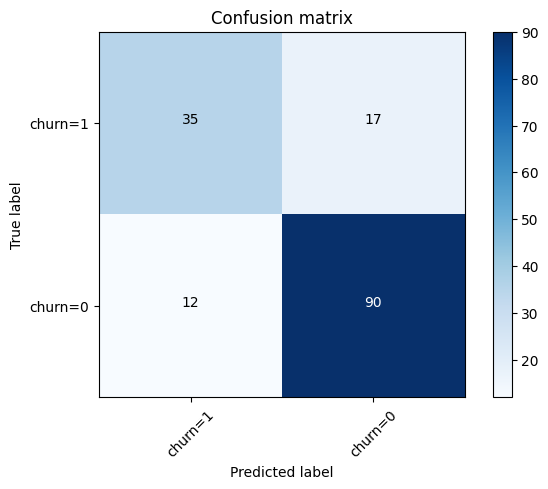

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.74      0.67      0.71        52

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5157162222259982

In [ ]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.50
